# Data Collection and Exploration

This notebook performs initial data collection and exploratory data analysis (EDA) on the CICIDS2017 dataset, including:
- Data loading and basic information
- Data quality assessment
- Label distribution analysis
- Feature exploration and statistics
- Initial data visualization

## 1. Import Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Load the dataset
data_path = 'data/CICIDS2017.csv' 
df = pd.read_csv(data_path)

# Show first few rows
df.head()


,id,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,1,192.168.10.50-192.168.10.3-56108-3268-6,192.168.10.50,56108,192.168.10.3,3268,6,2017-07-07 11:59:50.315195,112740690,32,...,343,1.610540e+07,4.988048e+05,16399772,15375229,-1,-1,112740690,BENIGN,-1
1,2,192.168.10.50-192.168.10.3-42144-389-6,192.168.10.50,42144,192.168.10.3,389,6,2017-07-07 11:59:50.316273,112740560,32,...,285,1.610543e+07,4.987937e+05,16399782,15375263,-1,-1,112740560,BENIGN,-1
2,3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2017-07-07 12:00:31.388567,113757377,545,...,19,1.221036e+07,6.935824e+06,20757030,5504997,-1,-1,0,BENIGN,-1
3,4,192.168.10.25-224.0.0.251-5353-5353-17,192.168.10.25,5353,224.0.0.251,5353,17,2017-07-07 12:00:42.903850,91997219,388,...,16,1.319764e+07,5.826905e+06,19776791,5817470,-1,-1,0,BENIGN,-1
4,5,192.168.10.25-17.253.14.125-123-123-17,192.168.10.25,123,17.253.14.125,123,17,2017-07-07 12:00:42.430758,66966070,6,...,1968172,6.497443e+07,0.000000e+00,64974431,64974431,-1,-1,0,BENIGN,-1


## 2. Data Loading

In [3]:
print("Shape of dataset:", df.shape)
print(f"Number of samples: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]:,}")

print("\nColumn names and types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes)):
    print(f"{i+1:2d}. {col:<30} | {dtype}")

# Check for missing values
print("\n" + "="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
missing_values = df.isnull().sum()
missing_total = missing_values.sum()

if missing_total > 0:
    print(f"Total missing values: {missing_total:,}")
    print("\nColumns with missing values:")
    for col, count in missing_values[missing_values > 0].items():
        percentage = (count / len(df)) * 100
        print(f"  {col:<30}: {count:,} ({percentage:.2f}%)")
else:
    print("No missing values found in the dataset!")

# Check for infinite values
print("\n" + "="*50)
print("INFINITE VALUES ANALYSIS")
print("="*50)
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_counts = {}
for col in numeric_cols:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        inf_counts[col] = inf_count

if inf_counts:
    print(f"Columns with infinite values:")
    for col, count in inf_counts.items():
        print(f"  {col:<30}: {count:,}")
else:
    print("No infinite values found in numeric columns!")


Shape of dataset: (547557, 91)
Number of samples: 547,557
Number of features: 91

Column names and types:
 1. id                             | int64
 2. Flow ID                        | object
 3. Src IP                         | object
 4. Src Port                       | int64
 5. Dst IP                         | object
 6. Dst Port                       | int64
 7. Protocol                       | int64
 8. Timestamp                      | object
 9. Flow Duration                  | int64
10. Total Fwd Packet               | int64
11. Total Bwd packets              | int64
12. Total Length of Fwd Packet     | int64
13. Total Length of Bwd Packet     | int64
14. Fwd Packet Length Max          | int64
15. Fwd Packet Length Min          | int64
16. Fwd Packet Length Mean         | float64
17. Fwd Packet Length Std          | float64
18. Bwd Packet Length Max          | int64
19. Bwd Packet Length Min          | int64
20. Bwd Packet Length Mean         | float64
21. Bwd Packet Length St

## 3. Basic Data Information and Quality Assessment


Label distribution:
 Label
BENIGN                288544
Portscan              159066
DDoS                   95144
Botnet - Attempted      4067
Botnet                   736
Name: count, dtype: int64


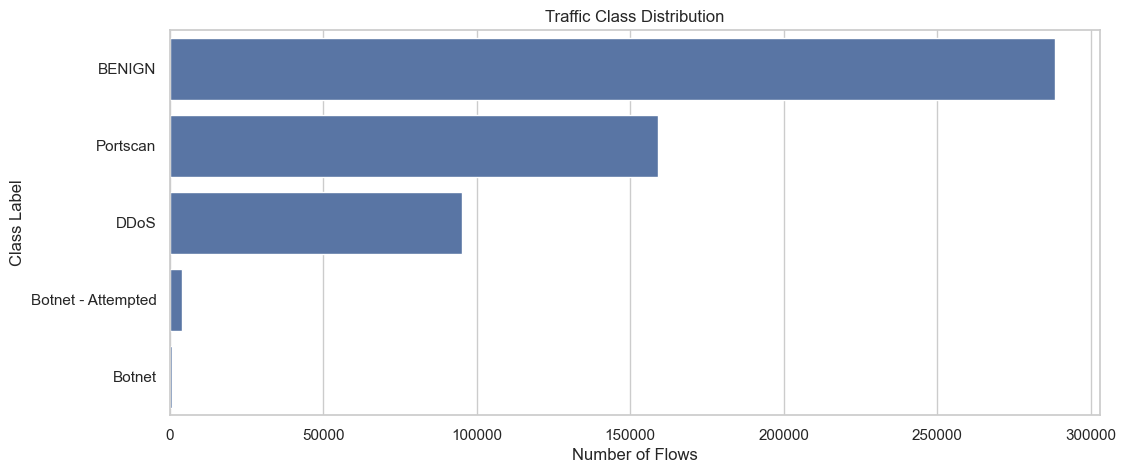

In [4]:
# Show number of records for each label
label_counts = df['Label'].value_counts()
print("\nLabel distribution:\n", label_counts)

# Plot label distribution
plt.figure(figsize=(12, 5))
sns.countplot(y='Label', data=df, order=label_counts.index)
plt.title("Traffic Class Distribution")
plt.xlabel("Number of Flows")
plt.ylabel("Class Label")
plt.show()


## 5. Feature Statistics and Exploration

In [5]:
# Get numeric columns (excluding label)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Label' in numeric_cols:
    numeric_cols.remove('Label')

print(f"Number of numeric features: {len(numeric_cols)}")
print("\nBasic statistics for numeric features:")
print(df[numeric_cols].describe())

# Check for features with zero variance (constant features)
print("\n" + "="*50)
print("ZERO VARIANCE FEATURES")
print("="*50)
zero_var_features = []
for col in numeric_cols:
    if df[col].nunique() == 1:
        zero_var_features.append(col)

if zero_var_features:
    print(f"Features with zero variance: {len(zero_var_features)}")
    for feature in zero_var_features[:10]:  # Show first 10
        print(f"  - {feature}")
    if len(zero_var_features) > 10:
        print(f"  ... and {len(zero_var_features) - 10} more")
else:
    print("No zero variance features found!")

# Features with high percentage of zeros
print("\n" + "="*50)
print("FEATURES WITH HIGH ZERO PERCENTAGE")
print("="*50)
high_zero_features = []
for col in numeric_cols:
    zero_pct = (df[col] == 0).sum() / len(df) * 100
    if zero_pct > 90:
        high_zero_features.append((col, zero_pct))

if high_zero_features:
    print("Features with >90% zeros:")
    for feature, pct in sorted(high_zero_features, key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {feature:<30}: {pct:.1f}%")
else:
    print("No features with >90% zeros found!")

Number of numeric features: 86

Basic statistics for numeric features:
                  id       Src Port       Dst Port       Protocol  \
count  547557.000000  547557.000000  547557.000000  547557.000000   
mean   273779.000000   47158.825030    2826.089161       9.785144   
std    158066.235011   16039.868513    8604.258903       5.233530   
min         1.000000       0.000000       0.000000       0.000000   
25%    136890.000000   39606.000000      53.000000       6.000000   
50%    273779.000000   52332.000000      80.000000       6.000000   
75%    410668.000000   59207.000000    1055.000000      17.000000   
max    547557.000000   65535.000000   65525.000000      17.000000   

       Flow Duration  Total Fwd Packet  Total Bwd packets  \
count   5.475570e+05     547557.000000      547557.000000   
mean    9.252255e+06          8.726116           9.444566   
std     2.609339e+07        648.644128         874.427110   
min     1.000000e+00          0.000000           0.000000   
25

## 6. Correlation Analysis and Data Visualization

Analyzing correlation for top 20 features by variance
Top features by variance:
 1. Total TCP Flow Time            | Variance: 4.17e+15
 2. Flow Duration                  | Variance: 7.03e+14
 3. Fwd IAT Total                  | Variance: 7.02e+14
 4. Bwd IAT Total                  | Variance: 6.97e+14
 5. Idle Max                       | Variance: 1.31e+14
 6. Fwd IAT Max                    | Variance: 1.30e+14
 7. Flow IAT Max                   | Variance: 1.30e+14
 8. Bwd IAT Max                    | Variance: 1.24e+14
 9. Idle Mean                      | Variance: 1.24e+14
10. Idle Min                       | Variance: 1.20e+14
11. Fwd IAT Mean                   | Variance: 5.95e+13
12. Bwd IAT Mean                   | Variance: 5.80e+13
13. Fwd IAT Min                    | Variance: 5.60e+13
14. Bwd IAT Min                    | Variance: 5.35e+13
15. Bwd Bulk Rate Avg              | Variance: 3.40e+13
16. Flow IAT Std                   | Variance: 2.35e+13
17. Bwd IAT Std         

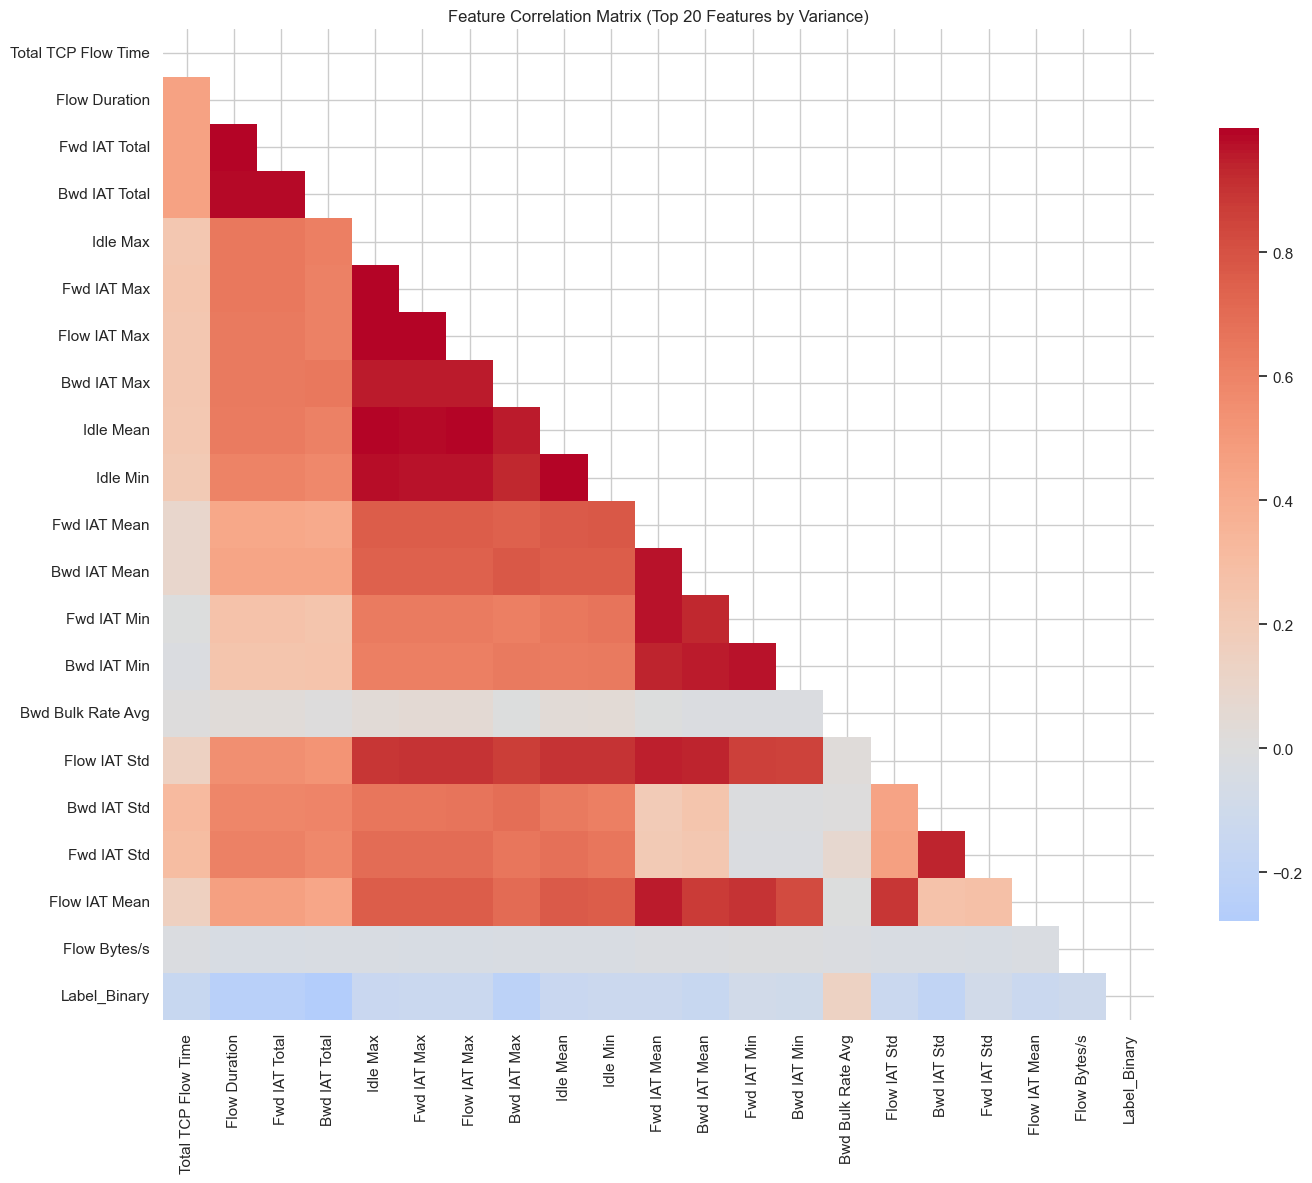


Top 10 features most correlated with attack labels:
  Bwd IAT Total                 : 0.2784
  Flow Duration                 : 0.2433
  Fwd IAT Total                 : 0.2419
  Bwd IAT Max                   : 0.2188
  Bwd IAT Std                   : 0.1932
  Bwd IAT Mean                  : 0.1528
  Total TCP Flow Time           : 0.1518
  Idle Max                      : 0.1432
  Bwd Bulk Rate Avg             : 0.1401
  Idle Mean                     : 0.1387


In [6]:
# Sample a subset for correlation analysis if dataset is large
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

# Convert label to numeric for correlation
label_encoded = pd.get_dummies(df_sample['Label']).iloc[:, 0]

# Select top features by variance for correlation analysis
feature_vars = df_sample[numeric_cols].var().sort_values(ascending=False)
top_features = feature_vars.head(20).index.tolist()

print(f"Analyzing correlation for top {len(top_features)} features by variance")
print("Top features by variance:")
for i, feature in enumerate(top_features, 1):
    print(f"{i:2d}. {feature:<30} | Variance: {feature_vars[feature]:.2e}")

# Create correlation matrix
corr_data = df_sample[top_features + ['Label']].copy()
# Convert label to binary (0 for BENIGN, 1 for others)
corr_data['Label_Binary'] = (corr_data['Label'] != 'BENIGN').astype(int)
corr_data = corr_data.drop('Label', axis=1)

correlation_matrix = corr_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=False,
            cmap='coolwarm', 
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (Top 20 Features by Variance)')
plt.tight_layout()
plt.show()

# Show features most correlated with target
target_corr = correlation_matrix['Label_Binary'].abs().sort_values(ascending=False)
print(f"\nTop 10 features most correlated with attack labels:")
for feature, corr in target_corr.head(11).items():  # 11 to exclude Label_Binary itself
    if feature != 'Label_Binary':
        print(f"  {feature:<30}: {corr:.4f}")

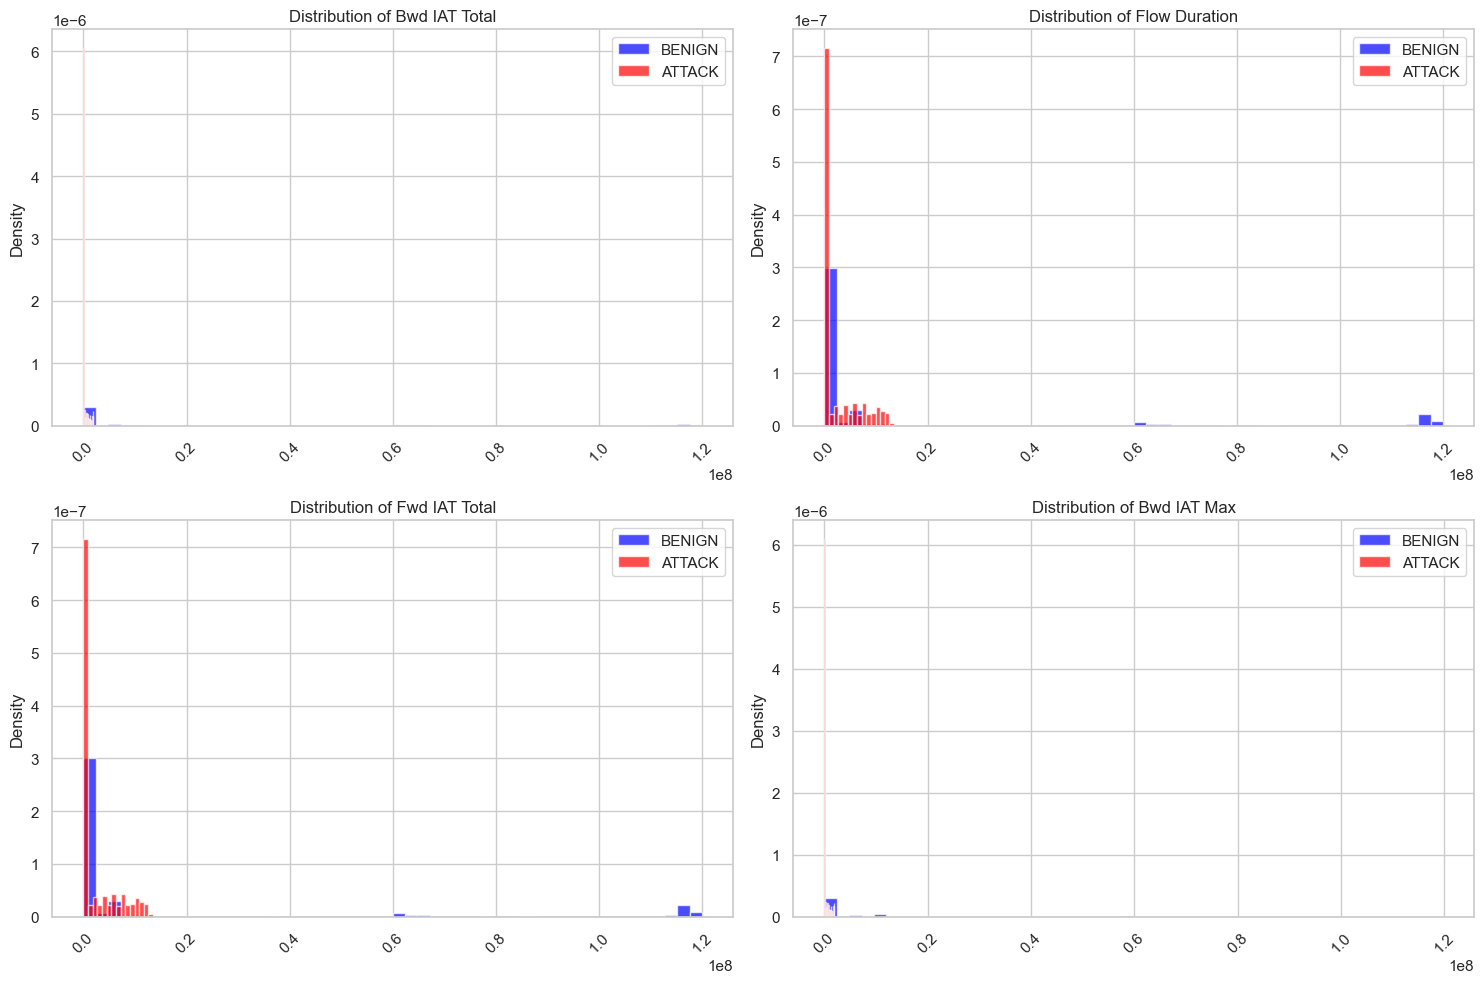

Summary statistics for top correlated features:

Bwd IAT Total:
  BENIGN  - Mean: 15003257.0845, Std: 34630265.6057
  ATTACK  - Mean: 268041.7018, Std: 520498.6161

Flow Duration:
  BENIGN  - Mean: 15405135.2387, Std: 34920681.1505
  ATTACK  - Mean: 2475386.0291, Std: 4017197.6764

Fwd IAT Total:
  BENIGN  - Mean: 15328124.2081, Std: 34922518.6922
  ATTACK  - Mean: 2475348.5919, Std: 4017220.6410

Bwd IAT Max:
  BENIGN  - Mean: 5154755.3861, Std: 14855203.2884
  ATTACK  - Mean: 264131.7750, Std: 517707.4564


In [7]:
# Visualize distribution of top correlated features
top_corr_features = target_corr.head(6).index.tolist()
if 'Label_Binary' in top_corr_features:
    top_corr_features.remove('Label_Binary')
top_corr_features = top_corr_features[:4]  # Take top 4

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(top_corr_features):
    # Create separate distributions for BENIGN vs ATTACK
    benign_data = df_sample[df_sample['Label'] == 'BENIGN'][feature]
    attack_data = df_sample[df_sample['Label'] != 'BENIGN'][feature]
    
    axes[i].hist(benign_data, bins=50, alpha=0.7, label='BENIGN', density=True, color='blue')
    axes[i].hist(attack_data, bins=50, alpha=0.7, label='ATTACK', density=True, color='red')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Show some summary statistics for these features
print("Summary statistics for top correlated features:")
print("="*60)
for feature in top_corr_features:
    print(f"\n{feature}:")
    benign_stats = df_sample[df_sample['Label'] == 'BENIGN'][feature].describe()
    attack_stats = df_sample[df_sample['Label'] != 'BENIGN'][feature].describe()
    
    print(f"  BENIGN  - Mean: {benign_stats['mean']:.4f}, Std: {benign_stats['std']:.4f}")
    print(f"  ATTACK  - Mean: {attack_stats['mean']:.4f}, Std: {attack_stats['std']:.4f}")

## 7. Data Insights and Preprocessing Recommendations

In [8]:
# Summary of key findings and recommendations
print("="*70)
print("DATA EXPLORATION SUMMARY & PREPROCESSING RECOMMENDATIONS")
print("="*70)

print(f"""
KEY FINDINGS:
✓ Dataset Shape: {df.shape[0]:,} samples × {df.shape[1]} features
✓ Label Distribution: Multiple attack types vs BENIGN traffic
✓ Data Quality: {'No missing values' if df.isnull().sum().sum() == 0 else 'Contains missing values'}
✓ Feature Types: Primarily numeric features

PREPROCESSING RECOMMENDATIONS:
""")

# Check class imbalance
benign_count = (df['Label'] == 'BENIGN').sum()
attack_count = len(df) - benign_count
imbalance_ratio = max(benign_count, attack_count) / min(benign_count, attack_count)

print(f"1. CLASS IMBALANCE:")
print(f"   - BENIGN: {benign_count:,} ({benign_count/len(df)*100:.1f}%)")
print(f"   - ATTACK: {attack_count:,} ({attack_count/len(df)*100:.1f}%)")
print(f"   - Imbalance Ratio: {imbalance_ratio:.1f}:1")
if imbalance_ratio > 5:
    print("   → RECOMMENDATION: Consider sampling techniques (SMOTE, undersampling)")

print(f"\n2. FEATURE ENGINEERING:")
print(f"   - Remove zero variance features: {len(zero_var_features) if 'zero_var_features' in locals() else 'Check needed'}")
print(f"   - Handle high-zero percentage features")
print(f"   - Consider feature selection based on correlation analysis")

print(f"\n3. DATA PREPROCESSING:")
print(f"   - Scale features (MinMaxScaler or StandardScaler)")
print(f"   - Handle infinite values if present")
print(f"   - Consider dimensionality reduction for high-dimensional data")

print(f"\n4. MODEL CONSIDERATIONS:")
print(f"   - Binary classification: BENIGN vs ATTACK")
print(f"   - Multi-class classification: Individual attack types")
print(f"   - Anomaly detection: Unsupervised approach")

print("="*70)

DATA EXPLORATION SUMMARY & PREPROCESSING RECOMMENDATIONS

KEY FINDINGS:
✓ Dataset Shape: 547,557 samples × 91 features
✓ Label Distribution: Multiple attack types vs BENIGN traffic
✓ Data Quality: No missing values
✓ Feature Types: Primarily numeric features

PREPROCESSING RECOMMENDATIONS:

1. CLASS IMBALANCE:
   - BENIGN: 288,544 (52.7%)
   - ATTACK: 259,013 (47.3%)
   - Imbalance Ratio: 1.1:1

2. FEATURE ENGINEERING:
   - Remove zero variance features: 3
   - Handle high-zero percentage features
   - Consider feature selection based on correlation analysis

3. DATA PREPROCESSING:
   - Scale features (MinMaxScaler or StandardScaler)
   - Handle infinite values if present
   - Consider dimensionality reduction for high-dimensional data

4. MODEL CONSIDERATIONS:
   - Binary classification: BENIGN vs ATTACK
   - Multi-class classification: Individual attack types
   - Anomaly detection: Unsupervised approach
